In [1]:
# Let's try to put together, maybe as astrometry figure of merit that we could then compute for any run

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [3]:
dbFile = 'baseline2018a.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [5]:
bundleList = []

slicer = slicers.HealpixSlicer()

metric = metrics.ParallaxMetric()
sql = ''
bundle = metricBundles.MetricBundle(metric, slicer, sql)
bundleList.append(bundle)

metric = metrics.ProperMotionMetric()
bundle = metricBundles.MetricBundle(metric, slicer, sql)
bundleList.append(bundle)

metric = metrics.ParallaxCoverageMetric()
bundle = metricBundles.MetricBundle(metric, slicer, sql)
bundleList.append(bundle)

metric = metrics.ParallaxDcrDegenMetric()
bundle = metricBundles.MetricBundle(metric, slicer, sql)
bundleList.append(bundle)


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with no constraint for columns ['fieldRA', 'fieldDec', 'altitude', 'seeingFwhmGeom', 'observationStartLST', 'filter', 'observationStartMJD', 'fiveSigmaDepth'].
Found 2372700 visits
Running:  ['opsim_parallax_HEAL', 'opsim_properMotion_HEAL', 'opsim_ParallaxCoverageMetric_HEAL', 'opsim_ParallaxDcrDegenMetric_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.
monopole: 0.847326  dipole: lon: -58.2417, lat: 82.0396, amp: 0.304573
monopole: 0.207768  dipole: lon: -77.6381, lat: 76.6429, amp: 0.0241247
monopole: 0.573856  dipole: lon: -69.3842, lat: 9.09414, amp: 0.0438628
monopole: 0.107476  dipole: lon: -111.941, lat: -73.1975, amp: 0.486846
Plotting complete.


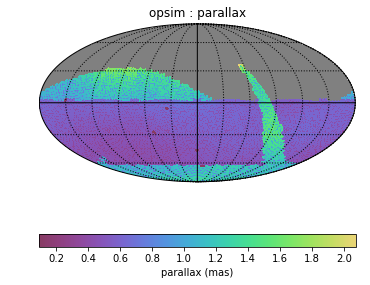

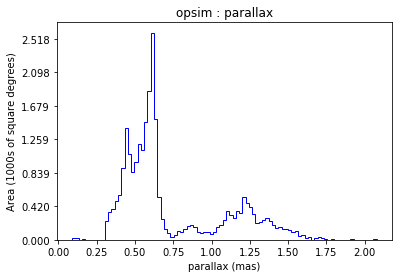

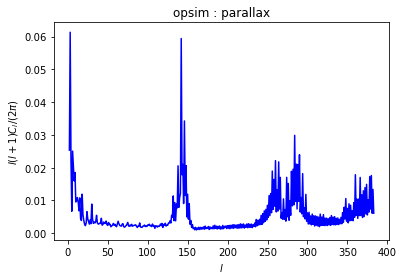

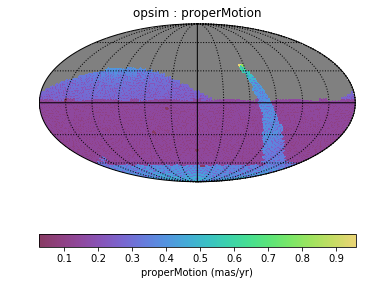

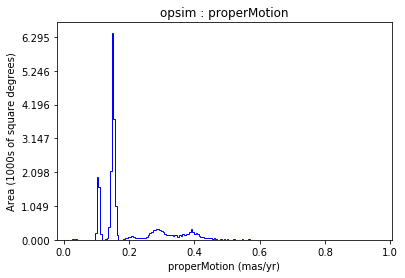

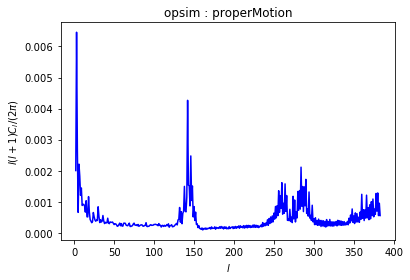

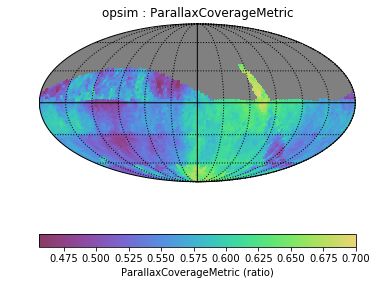

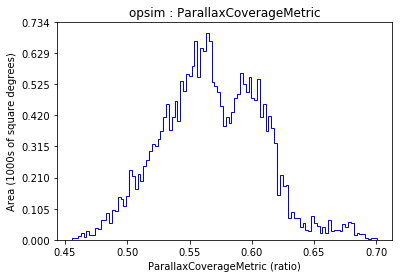

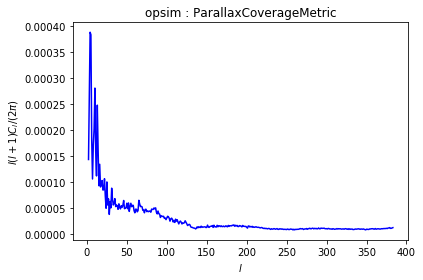

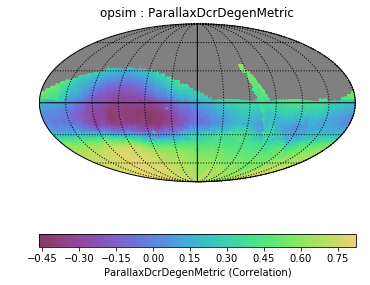

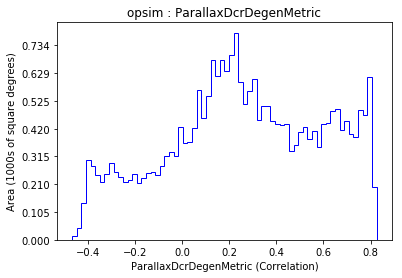

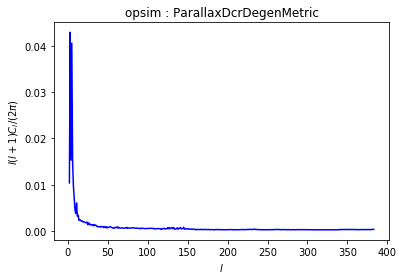

In [6]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

In [8]:
# Should make a summary metric that is bottom-up-to-area and top down to area. 


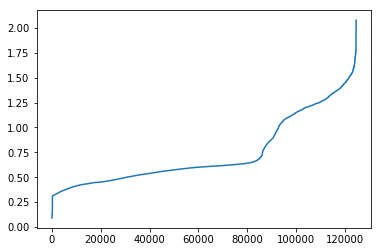

In [25]:
i=0
order = np.argsort(bundleList[i].metricValues)
nside = 128
plt.plot(bundleList[i].metricValues[order])
pix_area = hp.nside2pixarea(nside, degrees=True)
wfd_area = 18000. # sq degrees
n_pix = np.round(wfd_area/pix_area)


In [26]:
# could call this the min WFD value
# Would want to reverse order for things where 
bundleList[i].metricValues[order][int(n_pix)]

0.71416928514368438